In [12]:
import pandas as pd
import os

logbase = '/home/jos/tensorflowlogs/peregrine/v0.9.8'
lpq_infix = 'a3c_ff/lpq=True/glpq=True'
ff_infix = 'a3c_ff/lpq=False/glpq=False'

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [29]:
import colorlover as cl

colorscale = cl.scales['8']['qual']['Dark2']
colorscalen = []

for c in cl.to_numeric(colorscale):
    colorscalen.append((c[0]/255., c[1]/255, c[2]/255))
colorscalen.append((0., 0., 0.))
colorscalen.append((1., 0., 0.))

In [33]:
envs = os.listdir(logbase)
print(envs)

['Enduro', 'Pong', 'BeamRider', 'Breakout', 'MsPacman']


In [19]:
def read_all_runs(path):
    dfs = []
    for subdir in os.listdir(path):
        results_path = os.path.join(path, subdir, 'evals.csv')
        dfs.append(pd.read_csv(results_path, names=['Epoch', 'Score'], sep='\t'))
    return pd.concat(dfs)
        

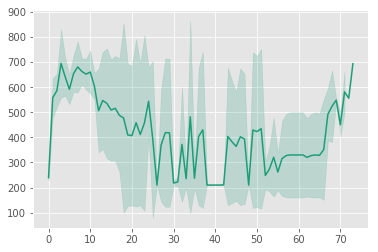

,Epoch,Model,Score
0,0,A3C Softmax,239.520000
1,1,A3C Softmax,558.200000
2,2,A3C Softmax,586.200000
3,3,A3C Softmax,694.880000
4,4,A3C Softmax,640.880000
5,5,A3C Softmax,591.760000
6,6,A3C Softmax,654.320000
7,7,A3C Softmax,680.960000
8,8,A3C Softmax,662.800000
9,9,A3C Softmax,652.160000


In [39]:
dfs_ff = []

for env_name in envs[4:]:
    #dfs_lpq = read_all_runs(os.path.join(logbase, env_name, lpq_infix))
    
    dfs_ff_env = read_all_runs(os.path.join(logbase, env_name, ff_infix))
    dfs_ff_env['Environment'] = env_name
    dfs_ff_env['Model'] = 'A3C Softmax'
    
    dfs_ff.append(dfs_ff_env)
    averages = dfs_ff_env.groupby(('Epoch','Model')).mean().reset_index()
    stds = dfs_ff_env.groupby(('Epoch', 'Model')).std().reset_index()
    
    plt.fill_between(averages['Epoch'], averages['Score'] - stds['Score'],
                     averages['Score'] + stds['Score'], alpha=0.2, color=colorscalen[0])
    handles = [plt.plot(averages['Epoch'], averages['Score'], linewidth=1.5, color=colorscalen[0])]
    
    
plt.show()
averages

In [23]:
dfs_ff

,Epoch,Score,Environment
0,0,-20.56,Pong
0,0,-20.52,Pong
0,0,-20.58,Pong
1,1,-20.16,Pong
2,2,-20.36,Pong
3,3,-20.56,Pong
4,4,-20.26,Pong
5,5,-20.32,Pong
6,6,-20.36,Pong
7,7,-20.18,Pong
